In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
hs = pd .read_csv('Housing.csv')

In [3]:
hs.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Exploration and Cleaning

In [4]:
#check for null values 
hs.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# summary statistics
hs.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# check for data types and all
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Check for skewness in numerical columns
numerical_cols = hs.select_dtypes(include=['number']).columns  
skewness_values = hs[numerical_cols].skew()

# Display skewness values
print("Skewness of Numerical Features:\n", skewness_values)


Skewness of Numerical Features:
 price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


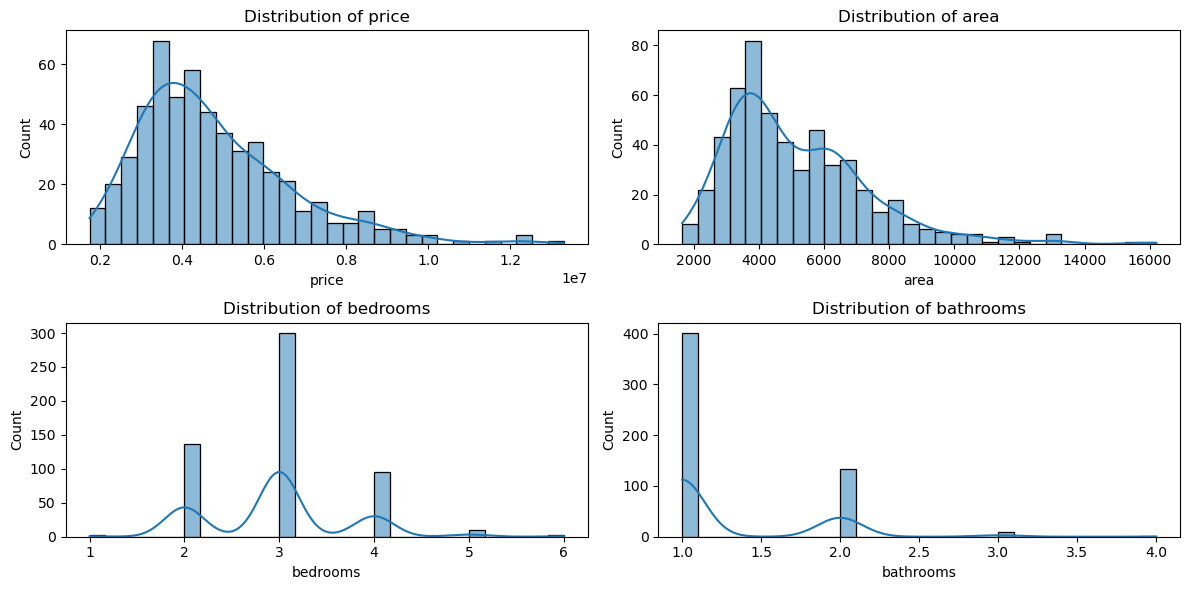

In [8]:
# show the data distribution in subplots 
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.histplot(hs[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

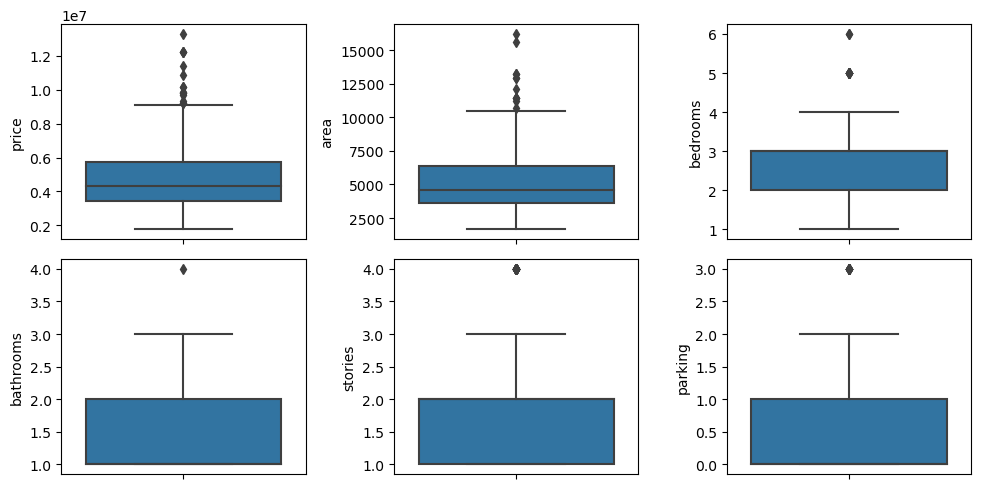

In [9]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(y=hs['price'], ax = axs[0,0])
plt2 = sns.boxplot(y=hs['area'], ax = axs[0,1])
plt3 = sns.boxplot(y=hs['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(y=hs['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(y=hs['stories'], ax = axs[1,1])
plt3 = sns.boxplot(y=hs['parking'], ax = axs[1,2])

plt.tight_layout()

In [10]:
# Identify numerical columns
numerical_cols = hs.select_dtypes(include=['number']).columns

# Display summary statistics
print(hs[numerical_cols].describe())


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [11]:
# Identify categorical columns
categorical_cols = hs.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [12]:
# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(hs, columns=categorical_cols, drop_first=True).astype(int)

# Display transformed dataset
print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

In [13]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int32
 1   area                             545 non-null    int32
 2   bedrooms                         545 non-null    int32
 3   bathrooms                        545 non-null    int32
 4   stories                          545 non-null    int32
 5   parking                          545 non-null    int32
 6   mainroad_yes                     545 non-null    int32
 7   guestroom_yes                    545 non-null    int32
 8   basement_yes                     545 non-null    int32
 9   hotwaterheating_yes              545 non-null    int32
 10  airconditioning_yes              545 non-null    int32
 11  prefarea_yes                     545 non-null    int32
 12  furnishingstatus_semi-furnished  545 non-null    i

#### Remove outliers in price column  using IQR method

In [15]:
import numpy as np
import pandas as pd

# Function to remove outliers using the IQR method for specific columns
def remove_outliers_iqr(df_encoded, columns):
    df_cleaned = df_encoded.copy()  # Create a copy to avoid modifying the original dataset
    
    for col in columns:
        Q1 = df_encoded[col].quantile(0.25)  # 25th percentile
        Q3 = df_encoded[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Compute Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Define lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Define upper threshold
        
        # Remove outliers only for "price" and "area"
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

# Apply the IQR method only for "price" and "area"
df_cleaned = remove_outliers_iqr(df_encoded, columns=["price", "area"])

# Compare original and cleaned dataset shape
print(f"Original dataset shape: {df_encoded.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (545, 14)
Cleaned dataset shape: (520, 14)


In [16]:
import numpy as np
import pandas as pd

# Function to trim outliers using the IQR method 
def trim_outliers_iqr(df_encoded, columns):
    df_trimmed = df_encoded.copy()  
    
    for col in columns:
        Q1 = df_encoded[col].quantile(0.25)  # 25th percentile
        Q3 = df_encoded[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Compute Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Define lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Define upper threshold
        
        # Trim the values outside the bounds
        df_trimmed = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)]
    
    return df_trimmed

# Function to cap outliers using the IQR method 
def cap_outliers_iqr(df_encoded, columns):
    df_capped = df_encoded.copy()  
    
    for col in columns:
        Q1 = df_encoded[col].quantile(0.25)  # 25th percentile
        Q3 = df_encoded[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Compute Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Define lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Define upper threshold
        
        # Cap the values outside the bounds
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped

# Apply trimming method
df_trimmed = trim_outliers_iqr(df_encoded, columns=["price", "area"])
print(f"Original dataset shape: {df_encoded.shape}")
print(f"Trimmed dataset shape: {df_trimmed.shape}")

# Apply capping method
df_capped = cap_outliers_iqr(df_encoded, columns=["price", "area"])
print(f"Original dataset shape: {df_encoded.shape}")
print(f"Capped dataset shape: {df_capped.shape}")


Original dataset shape: (545, 14)
Trimmed dataset shape: (520, 14)
Original dataset shape: (545, 14)
Capped dataset shape: (545, 14)


### check for outliers 

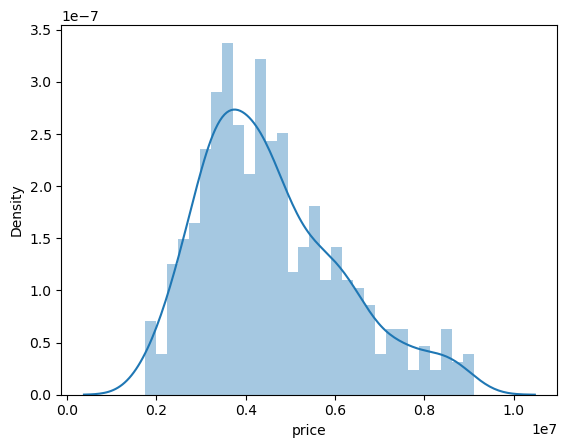

In [17]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_cleaned['price'], bins=30, kde=True)
plt.show()

<Axes: ylabel='price'>

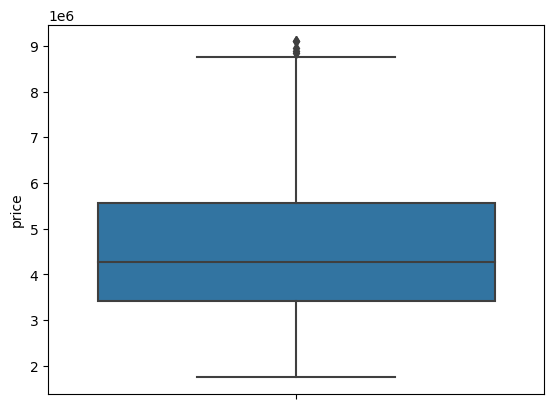

In [18]:
sns.boxplot(y=df_cleaned["price"])

<Axes: ylabel='area'>

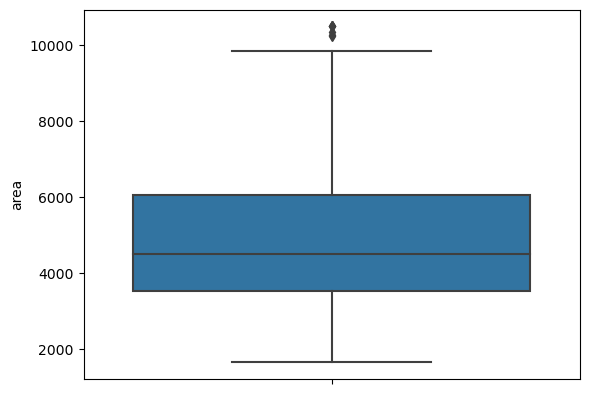

In [19]:
sns.boxplot(y=df_cleaned["area"])

# Feature selection and multicolinearity 

In [20]:
df_cleaned.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0


In [21]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


In [22]:
# Convert categorical variables into numerical using one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True).astype(int)

# Display transformed dataset
print(df_cleaned.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
15  9100000  6000         4          1        2        2             1   
16  9100000  6600         4          2        2        1             1   
17  8960000  8500         3          2        4        2             1   
18  8890000  4600         3          2        2        2             1   
19  8855000  6420         3          2        2        1             1   

    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
15              0             1                    0                    0   
16              1             1                    0                    1   
17              0             0                    0                    1   
18              1             0                    0                    1   
19              0             0                    0                    1   

    prefarea_yes  furnishingstatus_semi-furnished  \
15             0                       

In [23]:
target_column = "price"  # Replace with the actual target variable name
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

In [24]:
#vif function 


from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_cleaned.drop(columns=[target_column])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            Feature        VIF
0                              area   1.041968
1                          bedrooms  16.749134
2                         bathrooms   9.987546
3                           stories   7.787339
4                           parking   1.899757
5                      mainroad_yes   6.824667
6                     guestroom_yes   1.501782
7                      basement_yes   2.011694
8               hotwaterheating_yes   1.078006
9               airconditioning_yes   1.740281
10                     prefarea_yes   1.448858
11  furnishingstatus_semi-furnished   2.466329
12     furnishingstatus_unfurnished   2.081037


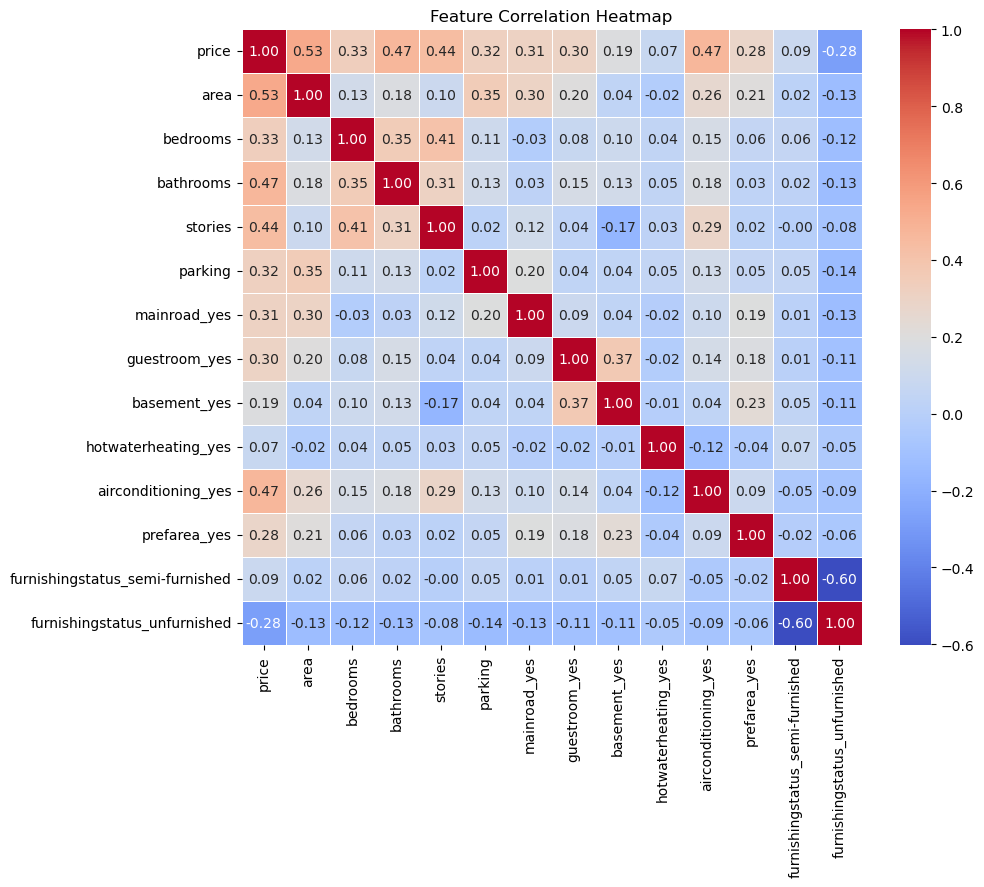

In [25]:
#feature selection for multicolinearity 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize predictors

# Apply Lasso regression
lasso = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso.fit(X_scaled, y)

# Get feature importance
lasso_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})
lasso_importance = lasso_importance.sort_values(by="Coefficient", ascending=False)

print("Lasso Feature Importance:\n", lasso_importance)


Lasso Feature Importance:
                             Feature    Coefficient
0                              area  444514.494472
3                           stories  399078.366965
9               airconditioning_yes  370560.174106
2                         bathrooms  355974.315523
10                     prefarea_yes  195383.954507
4                           parking  163132.854326
7                      basement_yes  160657.955413
5                      mainroad_yes  155274.847262
8               hotwaterheating_yes  142796.222540
6                     guestroom_yes  135445.357060
1                          bedrooms   53945.212570
11  furnishingstatus_semi-furnished    7082.297355
12     furnishingstatus_unfurnished -173547.281669


# preparing data for training 

In [27]:
target_column = "price"  # Replace with the actual target variable name
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

In [28]:
#split into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

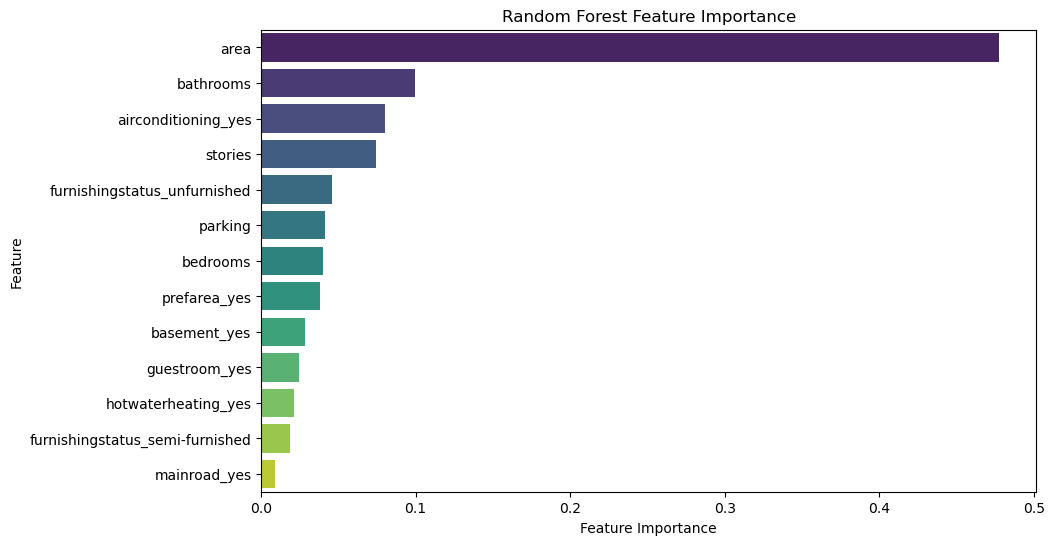

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
rf_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
rf_importance = rf_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance["Importance"], y=rf_importance["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# train the model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 774102.15
Mean Squared Error (MSE): 1042591273219.80
Root Mean Squared Error (RMSE): 1021073.59
R-squared (R²): 0.67


In [35]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")


Train R²: 0.6602860902337534
Test R²: 0.6653980702346332


In [36]:
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 808627787042.1094
Test MSE: 1042591273219.8022


In [37]:
#model coefficient
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)


                            Feature    Coefficient
0                              area  432761.044822
9               airconditioning_yes  394371.663008
3                           stories  365823.569209
2                         bathrooms  334978.249046
10                     prefarea_yes  213872.902484
8               hotwaterheating_yes  165333.804642
5                      mainroad_yes  149019.682684
4                           parking  147127.865543
6                     guestroom_yes  133966.308916
7                      basement_yes  109084.304606
1                          bedrooms   47278.526721
11  furnishingstatus_semi-furnished   18002.512077
12     furnishingstatus_unfurnished -152340.255186


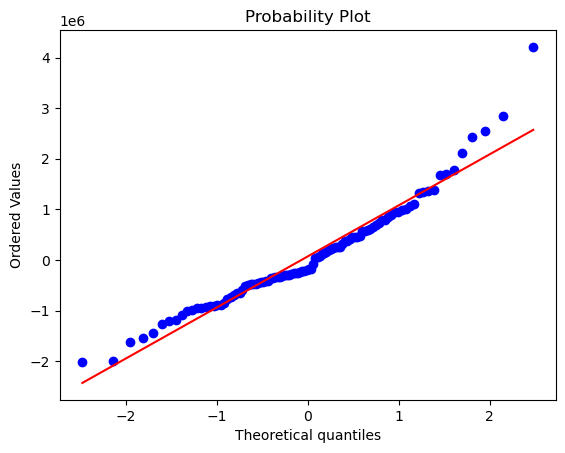

In [38]:
#Normality of residuals 
import scipy.stats as stats

residuals = y_test - y_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

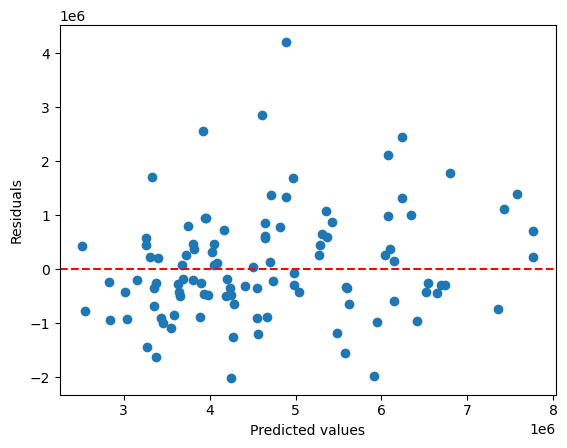

In [39]:
#homoscedacity 
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

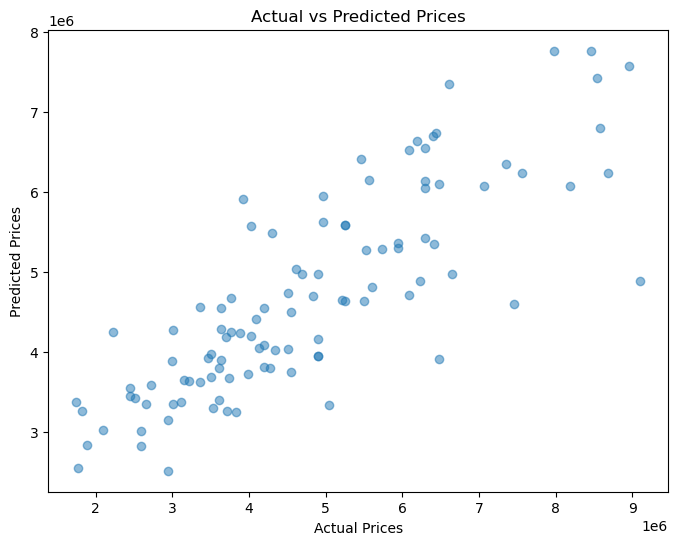

In [40]:
#actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

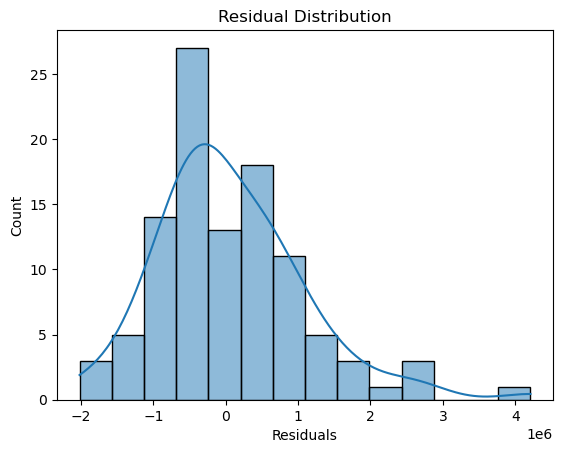

In [41]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()